In [1]:
import pandas as pd
df_cd4 = pd.read_csv('output_CD4.csv',index_col=0)
df_cd8 = pd.read_csv('output_CD8.csv',index_col=0)
df_cd8

,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g
AAACCTGAGAAACGAG-1_PEM7C3,0.310276,0.115504,-0.089312,0.122756,0.274960,2.379065,0.183773
AAACCTGAGAAACGCC-1_PEM19C5,0.335849,0.127954,-0.000145,0.144888,0.355742,1.971238,0.077946
AAACCTGAGAATGTGT-1_PEM6C1,0.359126,0.100121,-0.012360,0.186082,0.428613,2.023759,0.248609
AAACCTGAGACGACGT-1_PEM6C1,0.357353,0.116949,-0.077787,0.214784,0.333648,1.886388,0.186516
AAACCTGAGACTAGGC-1_PEM19C1,0.425252,0.230839,0.040042,0.126224,0.444901,1.943255,0.101123
...,...,...,...,...,...,...,...
TTTGGTTTCTAACTTC-1_PEM15C1,0.483837,0.171274,0.060531,0.226800,0.548273,2.270705,0.288435
TTTGTCAAGGACATTA-1_PEM2C1,0.589853,0.291693,0.149015,0.364157,0.453623,1.906890,0.251193
TTTGTCAGTAGAAAGG-1_PEM8C3,0.450395,0.173988,0.006984,0.137751,0.460617,1.771264,0.175715
TTTGTCAGTCACACGC-1_PEM10C1,0.522378,0.166719,0.047142,0.229143,0.462623,2.315800,0.202334


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8Lowery_pos_243g", 
    "CD8Oliveira_TTE_100g", 
    "CD8Oliveira_pos_74g", 
    "CD8Yost_CD8_Exh_100g", 
    "ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    #"CD8Lowery_neg_99g",
    "ave_Hanada_neg_5g", 
    "ave_Oliveira_virus_26g"
]

pos_sigs_CD4 = [
    "Hanada_pos_9g", 
    "CD4Caushi_Tfh2_66g", 
    #"CD4Jansen_TermDiff_73g", 
    "CD4Lowery_pos_40g", 
    "CD4Oh_CXCL13_50g"
]
neg_sigs_CD4 = [
    "CD4Lowery_neg_37g", 
    "Hanada_neg_4g"
]

def classify_cells(df, cell_type, pos_sigs, neg_sigs):
    sub = df.copy()
    cols = pos_sigs + neg_sigs

    # z‐score the signatures _within_ this subset
    sub[cols] = sub[cols].apply(zscore)

    # compute mean “pos” and “neg” scores
    sub[f"pos_score_{cell_type}"] = sub[pos_sigs].mean(axis=1)
    sub[f"neg_score_{cell_type}"] = sub[neg_sigs].mean(axis=1)

    # pick cutoffs (here: median)
    pos_cut = sub[f"pos_score_{cell_type}"].median()
    neg_cut = sub[f"neg_score_{cell_type}"].median()

    # classify per cell
    sub[f"cancer_reactive_per_cell_{cell_type}"] = (
        (sub[f"pos_score_{cell_type}"] >  pos_cut) &
        (sub[f"neg_score_{cell_type}"] <  neg_cut)
    )

    return sub, pos_cut, neg_cut

# run it for each cell‐type
cd8_called,pos_cut_CD8, neg_cut_CD8= classify_cells(df_cd8, "CD8", pos_sigs_CD8, neg_sigs_CD8)
cd4_called,pos_cut_CD4, neg_cut_CD4 = classify_cells(df_cd4, "CD4", pos_sigs_CD4, neg_sigs_CD4)
cd8_called

,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGAAACGAG-1_PEM7C3,-0.625688,-0.169075,-0.575182,-0.628023,-0.670813,1.157476,-0.146761,-0.533756,0.505358,False
AAACCTGAGAAACGCC-1_PEM19C5,-0.341558,0.018034,0.535844,-0.346382,-0.005762,-0.072710,-1.543838,-0.027965,-0.808274,True
AAACCTGAGAATGTGT-1_PEM6C1,-0.082935,-0.400262,0.383645,0.177826,0.594157,0.085717,0.709160,0.134486,0.397438,False
AAACCTGAGACGACGT-1_PEM6C1,-0.102635,-0.147355,-0.431578,0.543076,-0.187654,-0.328656,-0.110555,-0.065229,-0.219606,False
AAACCTGAGACTAGGC-1_PEM19C1,0.651761,1.564276,1.036567,-0.583888,0.728250,-0.157118,-1.237873,0.679393,-0.697495,True
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTAACTTC-1_PEM15C1,1.302682,0.669078,1.291861,0.695982,1.579270,0.830616,1.234922,1.107775,1.032769,False
TTTGTCAAGGACATTA-1_PEM2C1,2.480588,2.478854,2.394383,2.443920,0.800057,-0.266813,0.743278,2.119560,0.238232,False
TTTGTCAGTAGAAAGG-1_PEM8C3,0.931115,0.709873,0.624668,-0.437209,0.857637,-0.675919,-0.253143,0.537217,-0.464531,True
TTTGTCAGTCACACGC-1_PEM10C1,1.730892,0.600620,1.125036,0.725805,0.874151,0.966641,0.098270,1.011301,0.532455,False


In [3]:
df_combined = pd.concat([cd4_called, cd8_called],
                     axis=0,          # stack rows
                     ignore_index=False,
                     sort=False)
df_combined

/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,CD4Caushi_Tfh2_66g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGAATGTTG-1_PEM2C3,0.173300,0.629297,0.322055,-0.078470,-1.267478,0.339100,-0.212649,0.484198,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGACCCACC-1_PEM16C1,-0.195592,0.579062,-0.067849,-0.036468,0.405824,-0.642596,0.026479,-0.031767,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGACCCACC-1_PEM2C3,1.122987,0.668222,2.540731,0.021345,2.288818,0.443131,1.493470,0.555676,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGACGACGT-1_PEM14C1,-0.478162,-0.886219,-0.129802,0.007892,0.743898,-0.566078,0.035957,-0.726148,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGACTGTAA-1_PEM13C5,-0.861237,-0.292109,0.049448,-0.388259,-1.063723,0.373315,-0.565943,0.040603,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTAACTTC-1_PEM15C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.302682,0.669078,1.291861,0.695982,1.579270,0.830616,1.234922,1.107775,1.032769,False
TTTGTCAAGGACATTA-1_PEM2C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.480588,2.478854,2.394383,2.443920,0.800057,-0.266813,0.743278,2.119560,0.238232,False
TTTGTCAGTAGAAAGG-1_PEM8C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.931115,0.709873,0.624668,-0.437209,0.857637,-0.675919,-0.253143,0.537217,-0.464531,True
TTTGTCAGTCACACGC-1_PEM10C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.730892,0.600620,1.125036,0.725805,0.874151,0.966641,0.098270,1.011301,0.532455,False


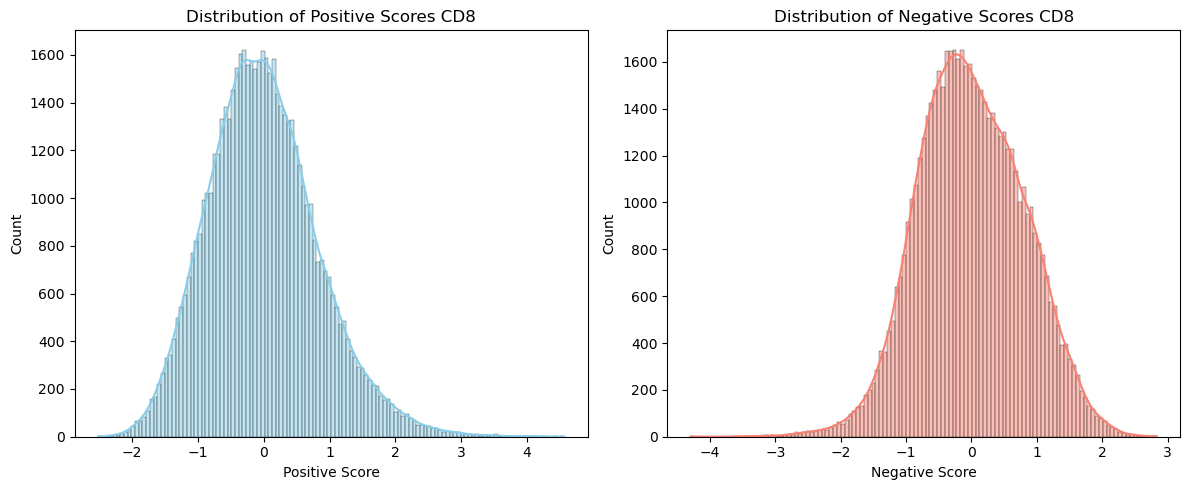

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cd8_called['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd8_called['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

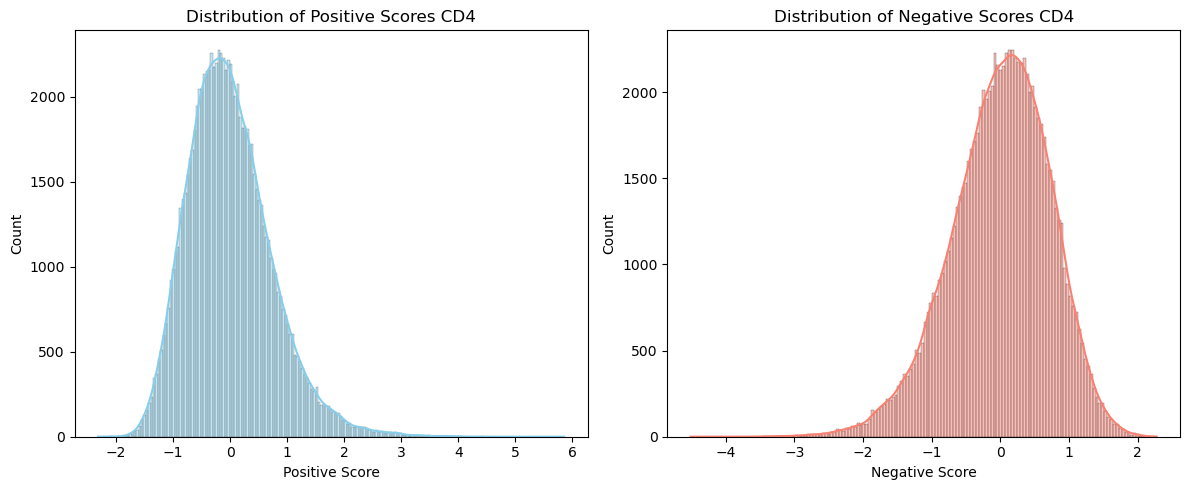

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cd4_called['pos_score_CD4'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD4')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd4_called['neg_score_CD4'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD4')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

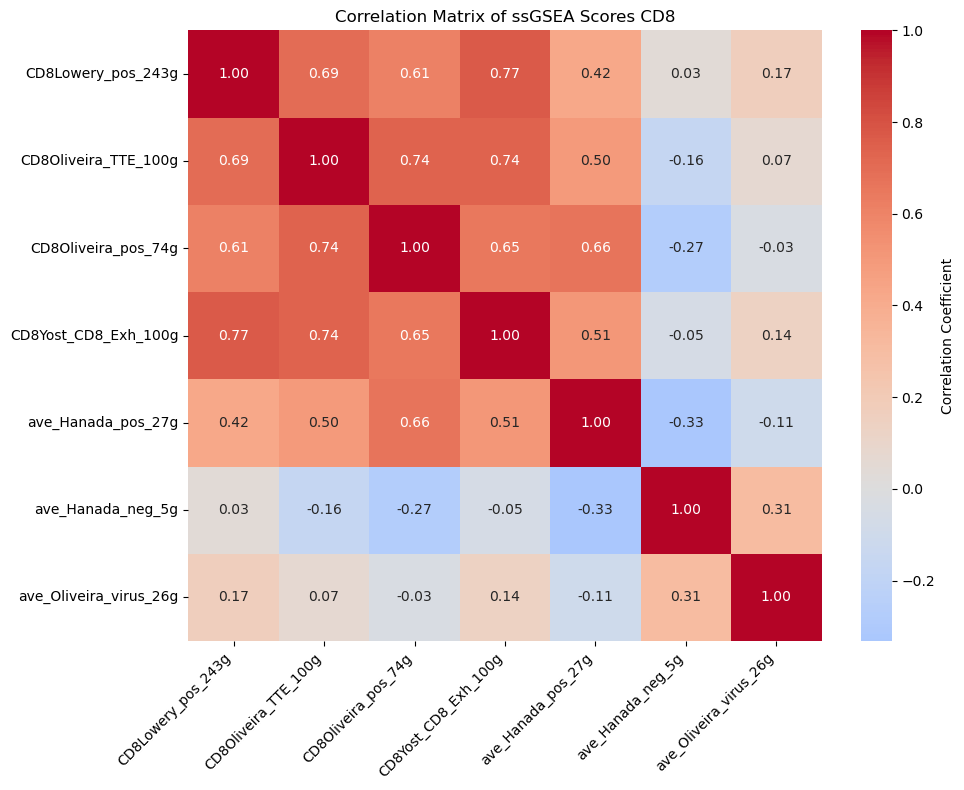

In [6]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd8_called[all_sigs_CD8].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

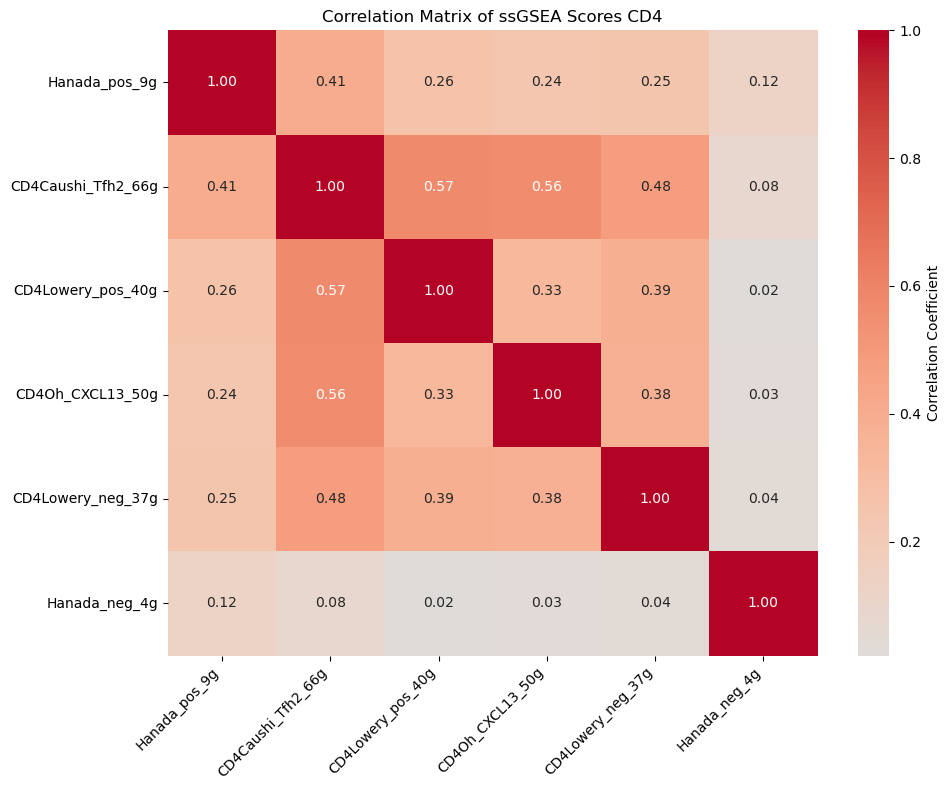

In [7]:
# Combine the lists to get all columns
all_sigs_CD4 = pos_sigs_CD4 + neg_sigs_CD4

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd4_called[all_sigs_CD4].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD4")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Clustering based on signature genes

In [8]:
import pickle
with open("signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})

del sigs_CD4['Jansen_TermDiff_73g']
del sigs_CD8['Lowery_neg_99g']

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [9]:
import scanpy as sc
adata = sc.read_h5ad("GSE212217_all_samples_with_metadata.h5ad")
t_cell = {"CD4":[
 'CD4 Activated', 'CD4 Naive', 'Treg'], 'CD8':['CD8 Activated',
 'CD8 Naive', 'CD8 Exhausted'
]}
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata_concat = adata[adata.obs["finalIdent"].isin(t_cell['CD8'])]
adata_concat_CD4 = adata[adata.obs["finalIdent"].isin(t_cell['CD4'])]

In [10]:
median_depth = np.median(adata_concat.obs['total_counts'].values)
sc.pp.normalize_total(adata_concat, target_sum=median_depth)
sc.pp.log1p(adata_concat)  # log transform

median_depth = np.median(adata_concat_CD4.obs['total_counts'].values)
sc.pp.normalize_total(adata_concat_CD4, target_sum=median_depth)
sc.pp.log1p(adata_concat_CD4) 

/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [11]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
all_genes_flat_CD4 = [item for sublist in sigs_CD4.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))
subset_genes_CD4 = list(set(all_genes_flat_CD4))

In [12]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata_concat.var.index):
        matched_genes_CD8.append(s1)
for s1 in subset_genes_CD4:
    if s1 in list(adata_concat_CD4.var.index):
        matched_genes_CD4.append(s1)    
# Print match info
print(f" {len(matched_genes_CD4)}/{len(subset_genes_CD4)} CD4 genes are found.")
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 162/164 CD4 genes are found.
 394/396 CD8 genes are found.


/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10

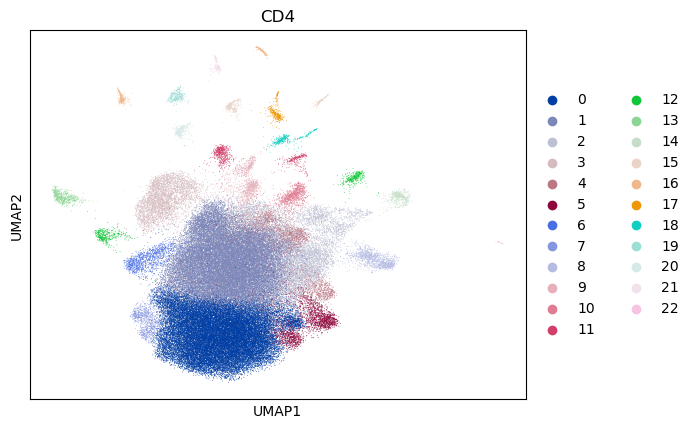

/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


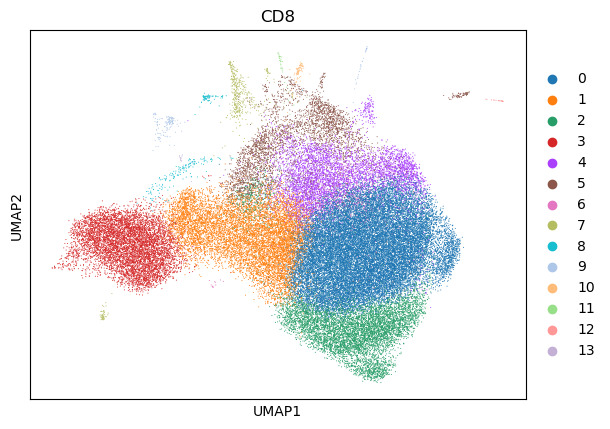

In [13]:
%matplotlib inline
def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.5)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs["leiden"].rename(f"cluster_{key}")

leiden_cd4 = run_cluster(adata_concat_CD4[:, matched_genes_CD4].copy(), "CD4")
leiden_cd8 = run_cluster(adata_concat[:, matched_genes_CD8].copy(), "CD8")

clusters_wide = pd.concat([leiden_cd4, leiden_cd8], axis=1)


In [14]:
merged_df = df_combined.join(clusters_wide[['cluster_CD4','cluster_CD8']])

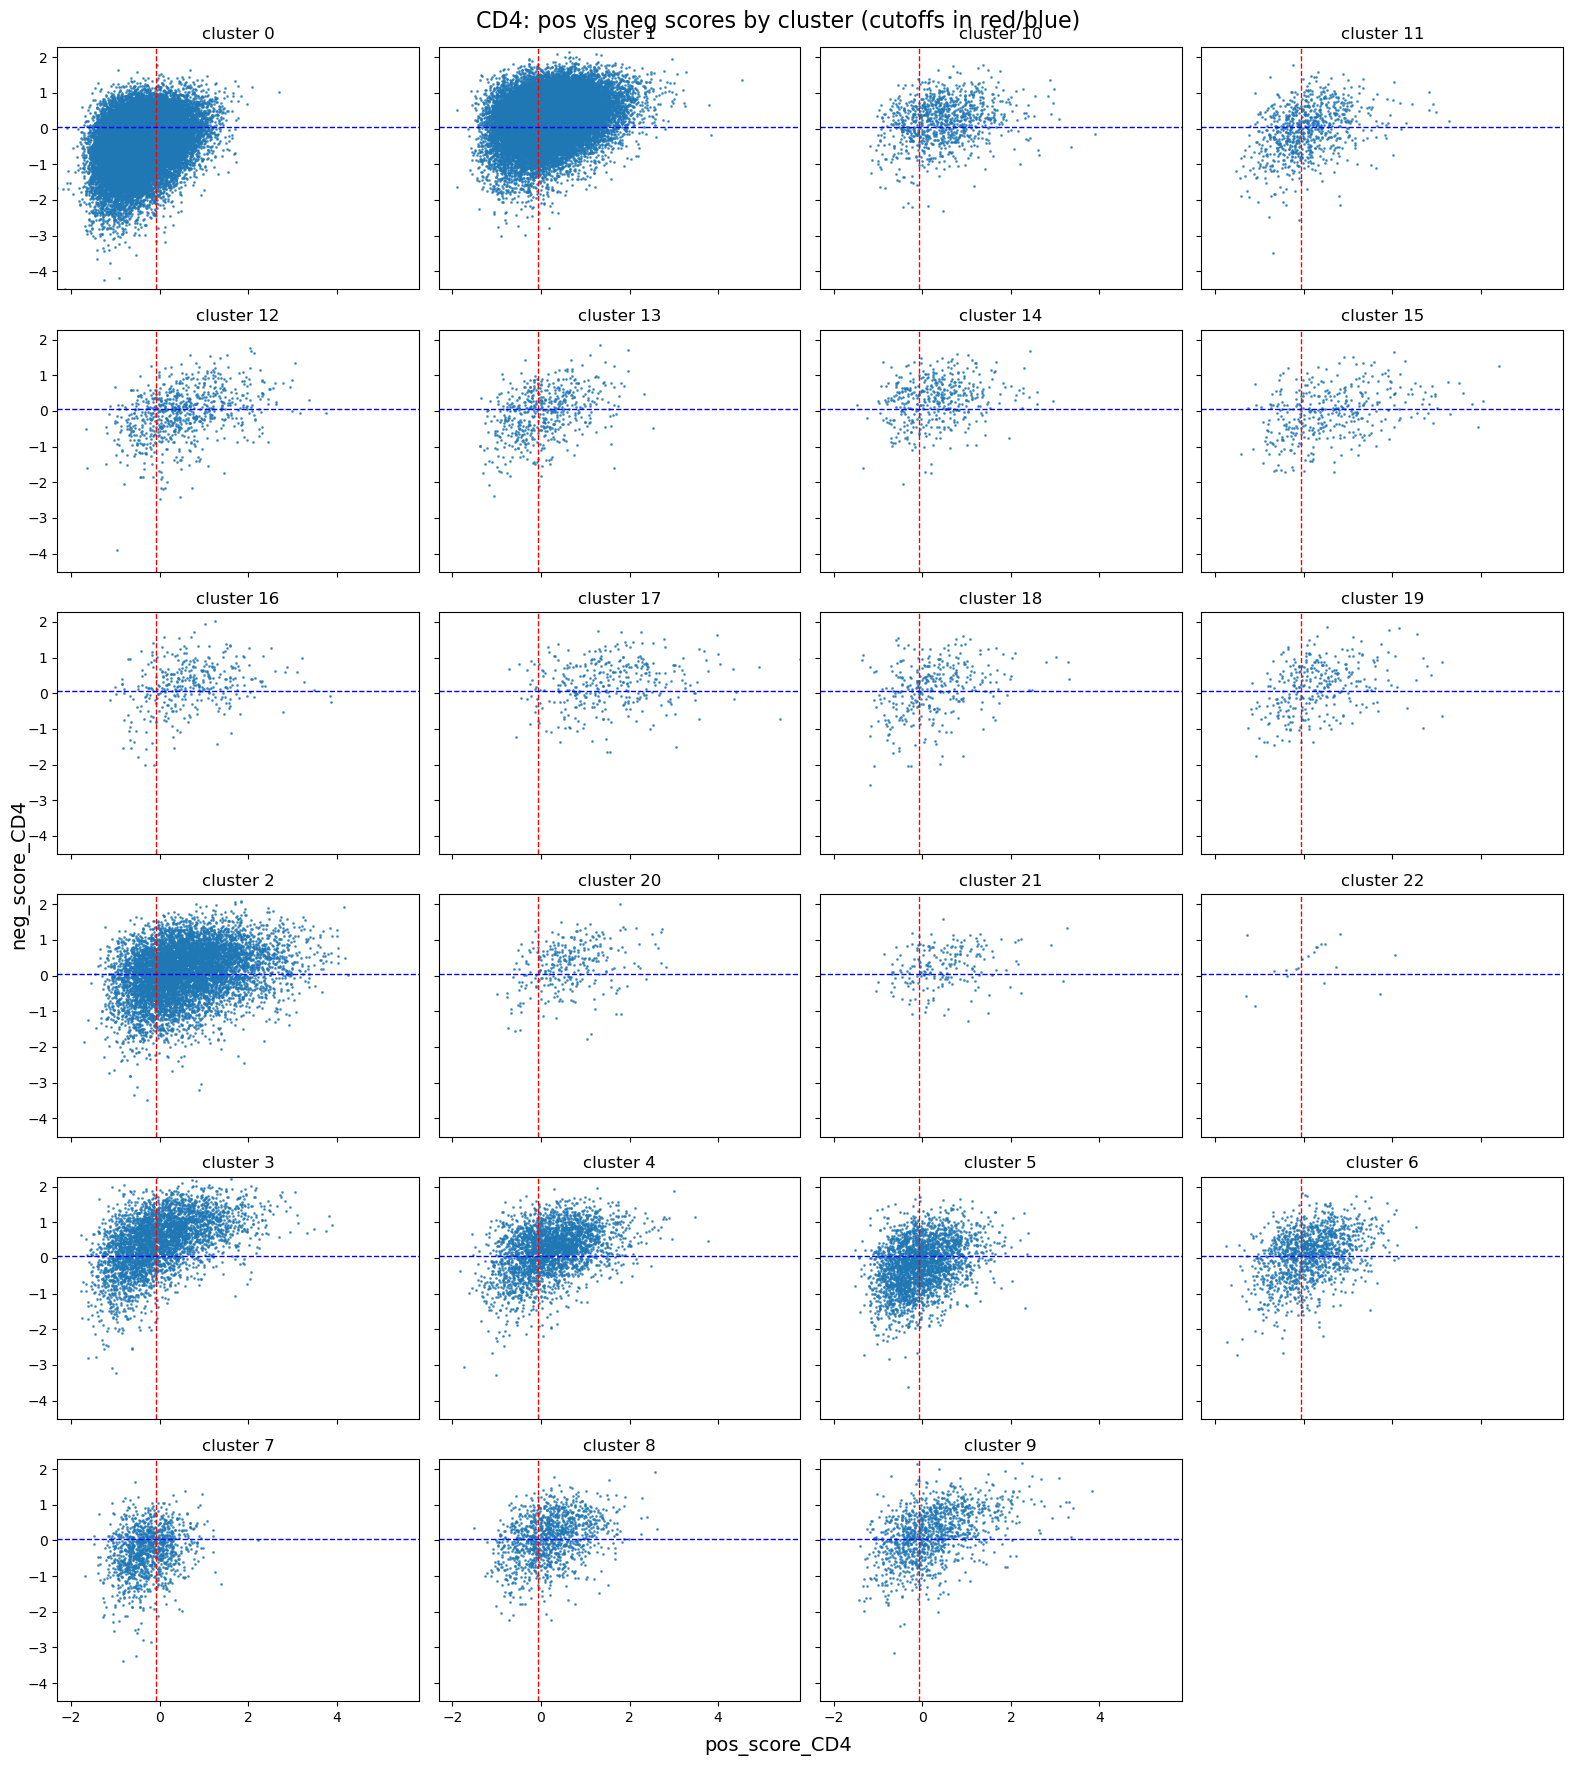

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clusters = [c for c in merged_df['cluster_CD4'].unique() if pd.notna(c)]
clusters = sorted(clusters)

# global axis limits
xmin, xmax = merged_df['pos_score_CD4'].min(), merged_df['pos_score_CD4'].max()
ymin, ymax = merged_df['neg_score_CD4'].min(), merged_df['neg_score_CD4'].max()

# layout
n = len(clusters)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4*ncols, 3*nrows),
    sharex=True, sharey=True
)

for ax, clu in zip(axes.flat, clusters):
    sub = merged_df[merged_df['cluster_CD4'] == clu]
    
    # scatter
    ax.scatter(
        sub['pos_score_CD4'],
        sub['neg_score_CD4'],
        s=1,
        alpha=0.7
    )
    
    # means
    # mean_x = sub['pos_score_CD4'].mean()
    # mean_y = sub['neg_score_CD4'].mean()
    
    # # vertical & horizontal lines
    # ax.axvline(mean_x, color='red', linestyle='--', linewidth=1)
    # ax.axhline(mean_y, color='blue', linestyle='--', linewidth=1)

    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# turn off any unused subplots
for ax in axes.flat[n:]:
    ax.axis('off')

# global labels & title
fig.supxlabel('pos_score_CD4', fontsize=14)
fig.supylabel('neg_score_CD4', fontsize=14)
fig.suptitle('CD4: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

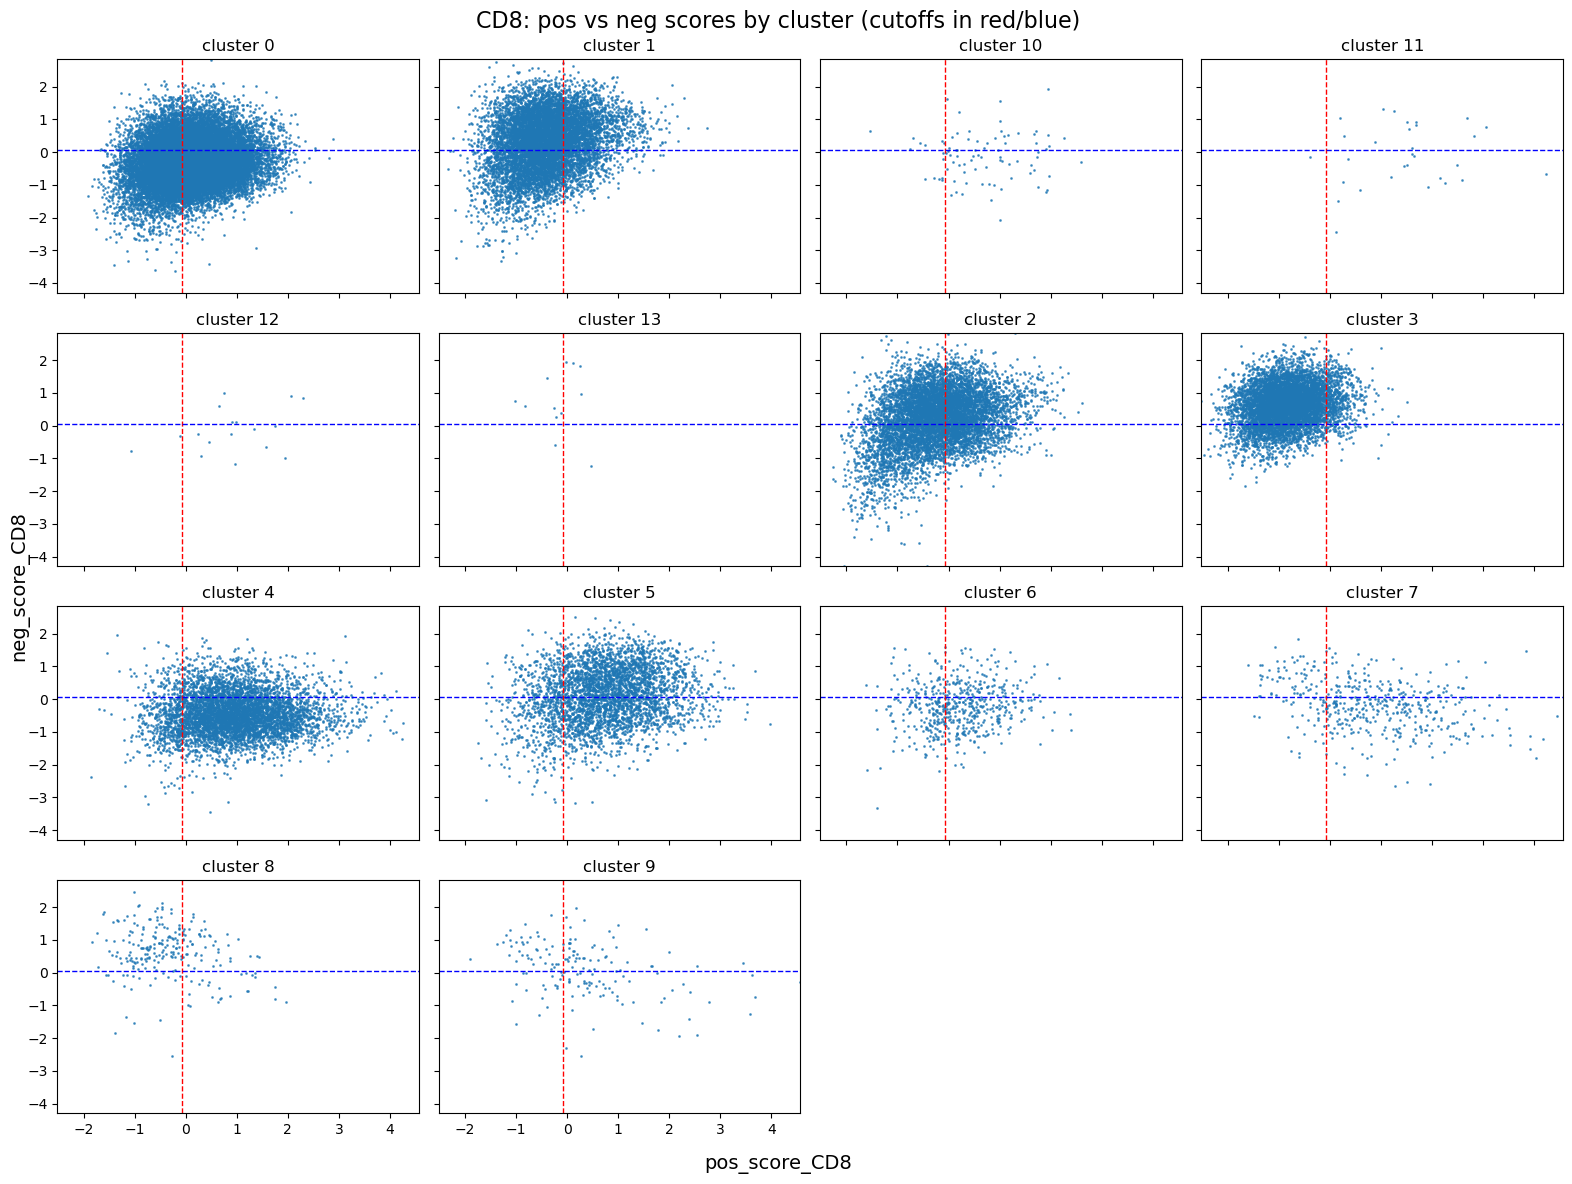

In [16]:
clusters_cd8 = [c for c in merged_df['cluster_CD8'].unique() if pd.notna(c)]
clusters_cd8 = sorted(clusters_cd8)

# compute global axis limits for CD8
xmin8, xmax8 = merged_df['pos_score_CD8'].min(), merged_df['pos_score_CD8'].max()
ymin8, ymax8 = merged_df['neg_score_CD8'].min(), merged_df['neg_score_CD8'].max()

# layout: 4 columns, as many rows as needed
n8 = len(clusters_cd8)
ncols8 = 4
nrows8 = int(np.ceil(n8 / ncols8))

fig8, axes8 = plt.subplots(
    nrows8, ncols8,
    figsize=(4*ncols8, 3*nrows8),
    sharex=True, sharey=True
)

for ax, clu in zip(axes8.flat, clusters_cd8):
    sub8 = merged_df[merged_df['cluster_CD8'] == clu]
    
    # scatter
    ax.scatter(
        sub8['pos_score_CD8'],
        sub8['neg_score_CD8'],
        s=1,
        alpha=0.7
    )
    
    # cluster means
    # mean_x8 = sub8['pos_score_CD8'].mean()
    # mean_y8 = sub8['neg_score_CD8'].mean()
    
    # # draw mean lines
    # ax.axvline(mean_x8, color='red', linestyle='--', linewidth=1)
    # ax.axhline(mean_y8, color='blue', linestyle='--', linewidth=1)
    
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin8, xmax8)
    ax.set_ylim(ymin8, ymax8)

# disable unused subplots
for ax in axes8.flat[n8:]:
    ax.axis('off')

# global labels & title
fig8.supxlabel('pos_score_CD8', fontsize=14)
fig8.supylabel('neg_score_CD8', fontsize=14)
fig8.suptitle('CD8: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

In [17]:
merged_df["CD_type_by_cluster"] = merged_df["cluster_CD4"].notna().map({True: "CD4", False: "CD8"})

In [18]:
merged_df["cluster"] = merged_df.apply(
    lambda r: r["cluster_CD4"] if r["CD_type_by_cluster"] == "CD4"
              else r["cluster_CD8"],
    axis=1
)

merged_df["cancer_reactive_per_cell"] = merged_df.apply(
    lambda r: r["cancer_reactive_per_cell_CD4"] if r["CD_type_by_cluster"] == "CD4"
              else r["cancer_reactive_per_cell_CD8"],
    axis=1
)

# Group by both cell_type & cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby(["CD_type_by_cluster", "cluster"])["cancer_reactive_per_cell"]
    .mean()
    .rename("reactive_fraction")
)

cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df

,CD_type_by_cluster,cluster,reactive_fraction
0,CD4,0,0.157813
1,CD4,1,0.155429
2,CD4,10,0.239220
3,CD4,11,0.206767
4,CD4,12,0.356579
5,CD4,13,0.231618
6,CD4,14,0.168565
7,CD4,15,0.359788
8,CD4,16,0.224377
9,CD4,17,0.337143


In [19]:
#  threshold and collect all (cell_type, cluster) pairs above it
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs


{('CD8', '10'), ('CD8', '11'), ('CD8', '12'), ('CD8', '4'), ('CD8', '7')}

In [20]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if (r["CD_type_by_cluster"], r["cluster"]) in reactive_pairs
              else False,
    axis=1
)
merged_df

/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,CD4Caushi_Tfh2_66g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8Lowery_pos_243g,...,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8,CD_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster
AAACCTGAGAATGTTG-1_PEM2C3,0.173300,0.629297,0.322055,-0.078470,-1.267478,0.339100,-0.212649,0.484198,False,NaN,...,NaN,NaN,NaN,NaN,0,NaN,CD4,0,False,False
AAACCTGAGACCCACC-1_PEM16C1,-0.195592,0.579062,-0.067849,-0.036468,0.405824,-0.642596,0.026479,-0.031767,True,NaN,...,NaN,NaN,NaN,NaN,1,NaN,CD4,1,True,False
AAACCTGAGACCCACC-1_PEM2C3,1.122987,0.668222,2.540731,0.021345,2.288818,0.443131,1.493470,0.555676,False,NaN,...,NaN,NaN,NaN,NaN,2,NaN,CD4,2,False,False
AAACCTGAGACGACGT-1_PEM14C1,-0.478162,-0.886219,-0.129802,0.007892,0.743898,-0.566078,0.035957,-0.726148,True,NaN,...,NaN,NaN,NaN,NaN,1,NaN,CD4,1,True,False
AAACCTGAGACTGTAA-1_PEM13C5,-0.861237,-0.292109,0.049448,-0.388259,-1.063723,0.373315,-0.565943,0.040603,False,NaN,...,NaN,NaN,NaN,NaN,1,NaN,CD4,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTAACTTC-1_PEM15C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.302682,...,1.234922,1.107775,1.032769,False,NaN,4,CD8,4,False,True
TTTGTCAAGGACATTA-1_PEM2C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.480588,...,0.743278,2.119560,0.238232,False,NaN,0,CD8,0,False,False
TTTGTCAGTAGAAAGG-1_PEM8C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.931115,...,-0.253143,0.537217,-0.464531,True,NaN,4,CD8,4,True,True
TTTGTCAGTCACACGC-1_PEM10C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.730892,...,0.098270,1.011301,0.532455,False,NaN,1,CD8,1,False,False


# Join with TCR data

In [21]:
vdj = pd.read_csv("vdj.csv",index_col=0)
vdj

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,full_length,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id,sample,orig.ident
cell_id,,,,,,,,,,,,,,,,,,,,
AAACCTGAGGATGGAA-1_PEM3C3,AAACCTGAGGATGGAA-1,True,AAACCTGAGGATGGAA-1_contig_1,True,703,TRB,TRBV7-9,TRBD1,TRBJ1-4,TRBC1,True,True,CASSLGTGANEKLFF,TGTGCCAGCAGCTTGGGGACAGGCGCCAATGAAAAACTGTTTTTT,122394,27,clonotype40,clonotype40_consensus_2,GSM6514154,PEM3C3
AAACCTGAGGATGGAA-1_PEM3C3,AAACCTGAGGATGGAA-1,True,AAACCTGAGGATGGAA-1_contig_2,True,517,TRA,TRAV13-1,None,TRAJ48,TRAC,True,True,CAARIGNEKLTF,TGTGCAGCAAGGATTGGAAATGAGAAATTAACCTTT,34504,7,clonotype40,clonotype40_consensus_1,GSM6514154,PEM3C3
AAACCTGTCGAATGGG-1_PEM3C3,AAACCTGTCGAATGGG-1,True,AAACCTGTCGAATGGG-1_contig_1,True,723,TRA,TRAV5,None,TRAJ42,TRAC,True,True,CAESENYGGSQGNLIF,TGTGCAGAGAGTGAAAATTATGGAGGAAGCCAAGGAAATCTCATCTTT,16219,3,clonotype86,clonotype86_consensus_2,GSM6514154,PEM3C3
AAACCTGTCGAATGGG-1_PEM3C3,AAACCTGTCGAATGGG-1,True,AAACCTGTCGAATGGG-1_contig_2,True,952,Multi,None,None,TRAJ5,TRAC,False,None,None,None,3252,1,clonotype86,None,GSM6514154,PEM3C3
AAACCTGTCGAATGGG-1_PEM3C3,AAACCTGTCGAATGGG-1,True,AAACCTGTCGAATGGG-1_contig_5,True,866,TRB,TRBV24-1,TRBD2,TRBJ2-1,TRBC2,True,True,CATSDFGMNNEQFF,TGTGCCACCAGTGATTTCGGGATGAACAATGAGCAGTTCTTC,62097,15,clonotype86,clonotype86_consensus_1,GSM6514154,PEM3C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGAGCGAT-1_PEM13C1,TTTGTCAGTGAGCGAT-1,True,TTTGTCAGTGAGCGAT-1_contig_2,True,460,TRB,TRBV28,None,TRBJ1-1,TRBC1,True,True,CASIRTTEAFF,TGTGCCAGTATCCGGACCACTGAAGCTTTCTTT,8263,4,clonotype2169,clonotype2169_consensus_1,GSM6514180,PEM13C1
TTTGTCAGTGAGCGAT-1_PEM13C1,TTTGTCAGTGAGCGAT-1,True,TTTGTCAGTGAGCGAT-1_contig_3,True,310,TRB,None,None,TRBJ2-5,TRBC2,False,False,None,None,4302,1,clonotype2169,None,GSM6514180,PEM13C1
TTTGTCATCTCACATT-1_PEM13C1,TTTGTCATCTCACATT-1,True,TTTGTCATCTCACATT-1_contig_1,True,465,TRA,TRAV13-1,None,TRAJ53,TRAC,True,True,CAASGGGGSNYKLTF,TGTGCAGCAAGTGGGGGTGGAGGTAGCAACTATAAACTGACATTT,3136,2,clonotype2170,clonotype2170_consensus_2,GSM6514180,PEM13C1


In [22]:
vdj['TCR_entry_number'] = vdj.groupby(vdj.index).cumcount()
vdj = vdj[vdj["chain"].isin(["TRA", "TRB"])]
vdj

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,productive,cdr3,cdr3_nt,reads,umis,raw_clonotype_id,raw_consensus_id,sample,orig.ident,TCR_entry_number
cell_id,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGGATGGAA-1_PEM3C3,AAACCTGAGGATGGAA-1,True,AAACCTGAGGATGGAA-1_contig_1,True,703,TRB,TRBV7-9,TRBD1,TRBJ1-4,TRBC1,...,True,CASSLGTGANEKLFF,TGTGCCAGCAGCTTGGGGACAGGCGCCAATGAAAAACTGTTTTTT,122394,27,clonotype40,clonotype40_consensus_2,GSM6514154,PEM3C3,0
AAACCTGAGGATGGAA-1_PEM3C3,AAACCTGAGGATGGAA-1,True,AAACCTGAGGATGGAA-1_contig_2,True,517,TRA,TRAV13-1,None,TRAJ48,TRAC,...,True,CAARIGNEKLTF,TGTGCAGCAAGGATTGGAAATGAGAAATTAACCTTT,34504,7,clonotype40,clonotype40_consensus_1,GSM6514154,PEM3C3,1
AAACCTGTCGAATGGG-1_PEM3C3,AAACCTGTCGAATGGG-1,True,AAACCTGTCGAATGGG-1_contig_1,True,723,TRA,TRAV5,None,TRAJ42,TRAC,...,True,CAESENYGGSQGNLIF,TGTGCAGAGAGTGAAAATTATGGAGGAAGCCAAGGAAATCTCATCTTT,16219,3,clonotype86,clonotype86_consensus_2,GSM6514154,PEM3C3,0
AAACCTGTCGAATGGG-1_PEM3C3,AAACCTGTCGAATGGG-1,True,AAACCTGTCGAATGGG-1_contig_5,True,866,TRB,TRBV24-1,TRBD2,TRBJ2-1,TRBC2,...,True,CATSDFGMNNEQFF,TGTGCCACCAGTGATTTCGGGATGAACAATGAGCAGTTCTTC,62097,15,clonotype86,clonotype86_consensus_1,GSM6514154,PEM3C3,2
AAACCTGTCGGTCTAA-1_PEM3C3,AAACCTGTCGGTCTAA-1,True,AAACCTGTCGGTCTAA-1_contig_1,True,826,TRB,TRBV19,TRBD1,TRBJ1-5,TRBC1,...,True,CASSITGDGQPQHF,TGTGCCAGTAGTATAACCGGGGATGGTCAGCCCCAGCATTTT,27495,8,clonotype87,clonotype87_consensus_1,GSM6514154,PEM3C3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGAGCGAT-1_PEM13C1,TTTGTCAGTGAGCGAT-1,True,TTTGTCAGTGAGCGAT-1_contig_2,True,460,TRB,TRBV28,None,TRBJ1-1,TRBC1,...,True,CASIRTTEAFF,TGTGCCAGTATCCGGACCACTGAAGCTTTCTTT,8263,4,clonotype2169,clonotype2169_consensus_1,GSM6514180,PEM13C1,1
TTTGTCAGTGAGCGAT-1_PEM13C1,TTTGTCAGTGAGCGAT-1,True,TTTGTCAGTGAGCGAT-1_contig_3,True,310,TRB,None,None,TRBJ2-5,TRBC2,...,False,None,None,4302,1,clonotype2169,None,GSM6514180,PEM13C1,2
TTTGTCATCTCACATT-1_PEM13C1,TTTGTCATCTCACATT-1,True,TTTGTCATCTCACATT-1_contig_1,True,465,TRA,TRAV13-1,None,TRAJ53,TRAC,...,True,CAASGGGGSNYKLTF,TGTGCAGCAAGTGGGGGTGGAGGTAGCAACTATAAACTGACATTT,3136,2,clonotype2170,clonotype2170_consensus_2,GSM6514180,PEM13C1,0


In [23]:
df_final = (
    merged_df
    .join(vdj)   # left‐join by index & column
)

# Set multi-index with barcode and TCR_entry_number
df_final = df_final.set_index('TCR_entry_number', append=True)
df_final

CD4Caushi_Tfh2_66g  \
                           TCR_entry_number                       
AAACCTGAGAAACGAG-1_PEM7C3  0.0                              NaN   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                              NaN   
                           1.0                              NaN   
AAACCTGAGAAACGCC-1_PEM5C5  0.0                         0.081289   
                           2.0                         0.081289   
...                                                         ...   
TTTGTCATCTTGTCAT-1_PEM8C1  1.0                         0.909676   
TTTGTCATCTTGTTTG-1_PEM10C5 0.0                        -1.048470   
                           2.0                        -1.048470   
TTTGTCATCTTTACAC-1_PEM2C3  0.0                         1.172318   
                           1.0                         1.172318   

                                             CD4Lowery_neg_37g  \
                           TCR_entry_number                      
AAACCTGAGAAACGAG-1_PEM7C3  0.0                             NaN   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                             NaN   
                           1.0                             NaN   
AAACCTGAGAAACGCC-1_PEM5C5  0.0                       -0.934260   
                           2.0                       -0.934260   
...                                                        ...   
TTTGTCATCTTGTCAT-1_PEM8C1  1.0                        1.358065   
TTTGTCATCTTGTTTG-1_PEM10C5 0.0                       -1.150338   
                           2.0                       -1.150338   
TTTGTCATCTTTACAC-1_PEM2C3  0.0                        0.624165   
                           1.0                        0.624165   

                                             CD4Lowery_pos_40g  \
                           TCR_entry_number                      
AAACCTGAGAAACGAG-1_PEM7C3  0.0                             NaN   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                             NaN   
                           1.0                             NaN   
AAACCTGAGAAACGCC-1_PEM5C5  0.0                        0.421847   
                           2.0                        0.421847   
...                                                        ...   
TTTGTCATCTTGTCAT-1_PEM8C1  1.0                        2.462771   
TTTGTCATCTTGTTTG-1_PEM10C5 0.0                       -0.117249   
                           2.0                       -0.117249   
TTTGTCATCTTTACAC-1_PEM2C3  0.0                        1.688949   
                           1.0                        1.688949   

                                             CD4Oh_CXCL13_50g  Hanada_pos_9g  \
                           TCR_entry_number                                    
AAACCTGAGAAACGAG-1_PEM7C3  0.0                            NaN            NaN   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                            NaN            NaN   
                           1.0                            NaN            NaN   
AAACCTGAGAAACGCC-1_PEM5C5  0.0                      -0.369841      -0.275818   
                           2.0                      -0.369841      -0.275818   
...                                                       ...            ...   
TTTGTCATCTTGTCAT-1_PEM8C1  1.0                       0.001293      -0.016531   
TTTGTCATCTTGTTTG-1_PEM10C5 0.0                      -0.678979      -0.229661   
                           2.0                      -0.678979      -0.229661   
TTTGTCATCTTTACAC-1_PEM2C3  0.0                       1.446047       0.132903   
                           1.0                       1.446047       0.132903   

                                             Hanada_neg_4g  pos_score_CD4  \
                           TCR_entry_number                                 
AAACCTGAGAAACGAG-1_PEM7C3  0.0                         NaN            NaN   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                         NaN            NaN   
                           1.0                         NaN            NaN   
AAACCTGAGAAACGCC-1_PEM5C5  0.

In [24]:
out_CD4 = df_final[df_final["CD_type_by_cluster"]=='CD4']
out_CD8 = df_final[df_final["CD_type_by_cluster"]=='CD8']
out_CD8 = out_CD8.dropna(axis=1, how='all')
out_CD4 = out_CD4.dropna(axis=1, how='all')
pd.set_option('display.max_columns', None)
out_CD8

CD8Lowery_pos_243g  \
                           TCR_entry_number                       
AAACCTGAGAAACGAG-1_PEM7C3  0.0                        -0.625688   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                        -0.341558   
                           1.0                        -0.341558   
AAACCTGAGAATGTGT-1_PEM6C1  0.0                        -0.082935   
                           2.0                        -0.082935   
...                                                         ...   
TTTGTCATCTCACATT-1_PEM14C5 1.0                         0.235303   
TTTGTCATCTCTTGAT-1_PEM14C5 0.0                         0.230063   
                           1.0                         0.230063   
TTTGTCATCTTACCGC-1_PEM7C3  0.0                         0.886611   
                           1.0                         0.886611   

                                             CD8Oliveira_TTE_100g  \
                           TCR_entry_number                         
AAACCTGAGAAACGAG-1_PEM7C3  0.0                          -0.169075   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                           0.018034   
                           1.0                           0.018034   
AAACCTGAGAATGTGT-1_PEM6C1  0.0                          -0.400262   
                           2.0                          -0.400262   
...                                                           ...   
TTTGTCATCTCACATT-1_PEM14C5 1.0                           0.062123   
TTTGTCATCTCTTGAT-1_PEM14C5 0.0                           0.338721   
                           1.0                           0.338721   
TTTGTCATCTTACCGC-1_PEM7C3  0.0                          -0.013344   
                           1.0                          -0.013344   

                                             CD8Oliveira_pos_74g  \
                           TCR_entry_number                        
AAACCTGAGAAACGAG-1_PEM7C3  0.0                         -0.575182   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                          0.535844   
                           1.0                          0.535844   
AAACCTGAGAATGTGT-1_PEM6C1  0.0                          0.383645   
                           2.0                          0.383645   
...                                                          ...   
TTTGTCATCTCACATT-1_PEM14C5 1.0                         -0.348157   
TTTGTCATCTCTTGAT-1_PEM14C5 0.0                          0.902150   
                           1.0                          0.902150   
TTTGTCATCTTACCGC-1_PEM7C3  0.0                          0.530072   
                           1.0                          0.530072   

                                             CD8Yost_CD8_Exh_100g  \
                           TCR_entry_number                         
AAACCTGAGAAACGAG-1_PEM7C3  0.0                          -0.628023   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                          -0.346382   
                           1.0                          -0.346382   
AAACCTGAGAATGTGT-1_PEM6C1  0.0                           0.177826   
                           2.0                           0.177826   
...                                                           ...   
TTTGTCATCTCACATT-1_PEM14C5 1.0                          -0.059130   
TTTGTCATCTCTTGAT-1_PEM14C5 0.0                           0.949473   
                           1.0                           0.949473   
TTTGTCATCTTACCGC-1_PEM7C3  0.0                           0.646276   
                           1.0                           0.646276   

                                             ave_Hanada_pos_27g  \
                           TCR_entry_number                       
AAACCTGAGAAACGAG-1_PEM7C3  0.0                        -0.670813   
AAACCTGAGAAACGCC-1_PEM19C5 0.0                        -0.005762   
                           1.0                        -0.005762   
AAACCTGAGAATGTGT-1_PEM6C1  0.0                         0.594157   
                           2.0                         0.594157   
...                    

In [25]:
out_CD8.to_csv("cell_meta_data_CD8.csv", index=True)
out_CD4.to_csv("cell_meta_data_CD4.csv", index=True)

In [26]:
out_CD8 = pd.read_csv('cell_meta_data_CD8.csv', index_col = [0,1])

df_ab  = out_CD8.reset_index().rename(columns={'level_0':'cell_id'}).copy()

# For each cell_id × chain, grab the row with the highest UMI count
idx = df_ab.groupby(['cell_id','chain'])['umis'].idxmax()
df_best = df_ab.loc[idx]

tcr_cols = df_best.columns[list(range(18, 33)) + [34]].tolist() 
meta_cols = [c for c in df_best.columns
             if c not in tcr_cols + ['chain','cell_id']]

# Extract metadata: take first row per cell_id
df_meta = (
    df_best
    .groupby('cell_id')[meta_cols]
    .first()
)

df_alpha = (
    df_best
    .loc[df_best['chain']=='TRA', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Alpha)')
)
df_beta = (
    df_best
    .loc[df_best['chain']=='TRB', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Beta)')
)


In [27]:
df_final = (
    df_meta
    .join(df_alpha, how='inner')
    .join(df_beta, how='inner')
    .reset_index()
)
df_final.drop(columns='TCR_entry_number', axis=1, inplace=True)

In [28]:
df_final

,cell_id,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,CD_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,raw_clonotype_id,sample,orig.ident,is_cell(Alpha),contig_id(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),raw_consensus_id(Alpha),is_cell(Beta),contig_id(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta),raw_consensus_id(Beta)
0,AAACCTGAGAAACGCC-1_PEM19C5,-0.341558,0.018034,0.535844,-0.346382,-0.005762,-0.072710,-1.543838,-0.027965,-0.808274,True,0,CD8,0,True,False,AAACCTGAGAAACGCC-1,clonotype26,GSM6514193,PEM19C5,True,AAACCTGAGAAACGCC-1_contig_2,True,514.0,TRA,TRAV38-1,None,TRAJ57,TRAC,True,True,CAFMTTQGGSEKLVF,TGTGCTTTCATGACCACTCAGGGCGGATCTGAAAAGCTGGTCTTT,4608.0,5.0,clonotype26_consensus_2,True,AAACCTGAGAAACGCC-1_contig_1,True,608.0,TRB,TRBV11-1,None,TRBJ1-1,TRBC1,True,True,CASSRGPITEAFF,TGTGCCAGCAGCCGGGGGCCGATCACTGAAGCTTTCTTT,4594.0,11.0,clonotype26_consensus_1
1,AAACCTGAGAATGTGT-1_PEM6C1,-0.082935,-0.400262,0.383645,0.177826,0.594157,0.085717,0.709160,0.134486,0.397438,False,0,CD8,0,False,False,AAACCTGAGAATGTGT-1,clonotype9,GSM6514159,PEM6C1,True,AAACCTGAGAATGTGT-1_contig_4,True,587.0,TRA,TRAV14/DV4,None,TRAJ4,TRAC,True,True,CAMREEPSGGYNKLIF,TGTGCAATGAGAGAGGAACCTTCTGGTGGCTACAATAAGCTGATTTTT,4877.0,7.0,clonotype9_consensus_1,True,AAACCTGAGAATGTGT-1_contig_2,True,424.0,TRB,None,None,TRBJ2-2,TRBC2,False,None,None,None,2238.0,4.0,None
2,AAACCTGAGACACTAA-1_PEM10C1,-0.680352,-1.027415,-0.936946,-1.222375,-1.017657,0.779604,-0.535713,-0.976949,0.121945,False,3,CD8,3,False,False,AAACCTGAGACACTAA-1,clonotype18,GSM6514171,PEM10C1,True,AAACCTGAGACACTAA-1_contig_1,True,702.0,TRA,TRAV10,None,TRAJ52,TRAC,True,True,CVVSDLNAGGTSYGKLTF,TGTGTGGTGAGCGATCTAAACGCTGGTGGTACTAGCTATGGAAAGC...,10199.0,3.0,clonotype18_consensus_2,True,AAACCTGAGACACTAA-1_contig_2,True,661.0,TRB,TRBV7-3,TRBD2,TRBJ2-7,TRBC2,True,True,CASSPRQAFFPYEQYF,TGTGCCAGCAGCCCCCGGCAGGCGTTCTTCCCCTACGAGCAGTACTTC,7449.0,2.0,clonotype18_consensus_1
3,AAACCTGAGACTAGAT-1_PEM7C3,0.438191,-0.862974,-0.888493,-0.470883,-0.423337,1.088837,0.647978,-0.441499,0.868407,False,1,CD8,1,False,False,AAACCTGAGACTAGAT-1,clonotype101,GSM6514163,PEM7C3,True,AAACCTGAGACTAGAT-1_contig_1,True,515.0,TRA,TRAV21,None,TRAJ28,TRAC,True,True,CAVHHSGAGSYQLTF,TGTGCTGTGCATCACTCTGGGGCTGGGAGTTACCAACTCACTTTC,6181.0,6.0,clonotype101_consensus_2,True,AAACCTGAGACTAGAT-1_contig_4,True,691.0,TRB,TRBV4-1,TRBD2,TRBJ1-2,TRBC1,True,True,CASSQGGANYGYTF,TGCGCCAGCAGCCAGGGAGGAGCAAACTATGGCTACACCTTC,9609.0,8.0,clonotype101_consensus_1
4,AAACCTGAGACTAGGC-1_PEM19C1,0.651761,1.564276,1.036567,-0.583888,0.728250,-0.157118,-1.237873,0.679393,-0.697495,True,0,CD8,0,True,False,AAACCTGAGACTAGGC-1,clonotype36,GSM6514192,PEM19C1,True,AAACCTGAGACTAGGC-1_contig_3,True,592.0,TRA,TRAV7,None,TRAJ22,TRAC,True,False,CCGSGSARQLTF,TGCTGTGGGTCTGGTTCTGCAAGGCAACTGACCTTT,1968.0,2.0,None,True,AAACCTGAGACTAGGC-1_contig_2,True,522.0,TRB,TRBV2,None,TRBJ2-7,TRBC2,True,True,CASTKGTKLPDEQYF,TGTGCCAGCACCAAGGGGACTAAATTACCTGACGAGCAGTACTTC,3460.0,5.0,clonotype36_consensus_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44032,TTTGTCATCGTTTAGG-1_PEM10C5,1.569934,1.322128,0.655605,1.175961,-0.023819,-1.512907,2.225253,0.939962,0.356173,False,5,CD8,5,False,False,TTTGTCATCGTTTAGG-1,clonotype2849,GSM6514173,PEM10C5,True,TTTGTCATCGTTTAGG-1_contig_7,True,556.0,TRA,TRAV26-1,None,TRAJ44,TRAC,True,True,CIVRPAVNGTASKLTF,TGCATC

In [29]:
df_final.to_csv("cell_meta_data_CD8_cleaned.csv", index=False)

In [30]:
out_CD4 = pd.read_csv('cell_meta_data_CD4.csv', index_col = [0,1])
df_ab  = out_CD4.reset_index().rename(columns={'level_0':'cell_id'}).copy()

# For each cell_id × chain, grab the row with the highest UMI count
idx = df_ab.groupby(['cell_id','chain'])['umis'].idxmax()
df_best = df_ab.loc[idx]

tcr_cols = df_best.columns[list(range(17, 32)) + [33]].tolist() 
meta_cols = [c for c in df_best.columns
             if c not in tcr_cols + ['chain','cell_id']]

# Extract metadata: take first row per cell_id
df_meta = (
    df_best
    .groupby('cell_id')[meta_cols]
    .first()
)

df_alpha = (
    df_best
    .loc[df_best['chain']=='TRA', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Alpha)')
)
df_beta = (
    df_best
    .loc[df_best['chain']=='TRB', ['cell_id'] + tcr_cols]
    .set_index('cell_id')
    .add_suffix('(Beta)')
)
df_final = (
    df_meta
    .join(df_alpha, how='inner')
    .join(df_beta, how='inner')
    .reset_index()
)
df_final.drop(columns='TCR_entry_number', axis=1, inplace=True)
df_final

,cell_id,CD4Caushi_Tfh2_66g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cluster_CD4,CD_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,raw_clonotype_id,sample,orig.ident,is_cell(Alpha),contig_id(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),raw_consensus_id(Alpha),is_cell(Beta),contig_id(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta),raw_consensus_id(Beta)
0,AAACCTGAGAAACGCC-1_PEM5C5,0.081289,-0.934260,0.421847,-0.369841,-0.275818,0.240826,-0.035631,-0.346717,True,0,CD4,0,True,False,AAACCTGAGAAACGCC-1,clonotype185,GSM6514158,PEM5C5,True,AAACCTGAGAAACGCC-1_contig_5,True,547.0,TRA,TRAV14/DV4,None,TRAJ9,TRAC,True,True,CAMREVYTGGFKTIF,TGTGCAATGAGAGAGGTCTATACTGGAGGCTTCAAAACTATCTTT,2683.0,4.0,clonotype185_consensus_1,True,AAACCTGAGAAACGCC-1_contig_1,True,757.0,TRB,TRBV6-1,TRBD1,TRBJ1-5,TRBC1,True,True,CASSEDARGTSGNQPQHF,TGTGCCAGCAGTGAAGATGCCAGGGGAACCTCGGGCAATCAGCCCC...,7901.0,12.0,clonotype185_consensus_2
1,AAACCTGAGAACAATC-1_PEM9C1,0.091195,-0.759640,-0.613855,0.020927,-1.042550,2.625710,-0.386071,0.933035,False,1,CD4,1,False,False,AAACCTGAGAACAATC-1,clonotype116,GSM6514168,PEM9C1,True,AAACCTGAGAACAATC-1_contig_2,True,552.0,TRA,TRAV12-2,None,TRAJ41,TRAC,True,True,CAVKQGSNSGYALNF,TGTGCCGTGAAGCAGGGGTCAAATTCCGGGTATGCACTCAACTTC,707.0,1.0,clonotype116_consensus_2,True,AAACCTGAGAACAATC-1_contig_1,True,506.0,TRB,TRBV9,TRBD1,TRBJ2-6,TRBC2,True,True,CASSVDGGAGANVLTF,TGTGCCAGCAGCGTAGACGGGGGGGCTGGGGCCAACGTCCTGACTTTC,4585.0,4.0,clonotype116_consensus_1
2,AAACCTGAGAAGAAGC-1_PEM12C3,-0.001025,-0.549470,-0.584877,-0.065417,1.550843,0.646801,0.224881,0.048665,True,4,CD4,4,True,False,AAACCTGAGAAGAAGC-1,clonotype54,GSM6514178,PEM12C3,True,AAACCTGAGAAGAAGC-1_contig_1,True,709.0,TRA,TRAV8-4,None,TRAJ8,TRAC,True,True,CAVSDRNMNTGFQKLVF,TGTGCTGTGAGTGATCGGAACATGAACACAGGCTTTCAGAAACTTG...,9701.0,7.0,clonotype54_consensus_2,True,AAACCTGAGAAGAAGC-1_contig_2,True,566.0,TRB,TRBV7-6,TRBD1,TRBJ2-3,TRBC2,True,True,CASSFVGRRATDTQYF,TGTGCCAGCAGCTTCGTCGGGCGCAGGGCAACAGATACGCAGTATTTT,9950.0,5.0,clonotype54_consensus_1
3,AAACCTGAGAAGGTTT-1_PEM12C1,-0.891891,0.905203,-0.356731,-1.061930,0.021262,0.756798,-0.572323,0.831001,False,0,CD4,0,False,False,AAACCTGAGAAGGTTT-1,clonotype44,GSM6514177,PEM12C1,True,AAACCTGAGAAGGTTT-1_contig_4,True,499.0,TRA,TRAV17,None,TRAJ45,TRAC,True,True,CAPYSGGGADGLTF,TGTGCTCCCTATTCAGGAGGAGGTGCTGACGGACTCACCTTT,7213.0,1.0,clonotype44_consensus_1,True,AAACCTGAGAAGGTTT-1_contig_1,True,848.0,TRB,TRBV5-6,None,TRBJ1-1,TRBC1,True,True,CASSLAPYGKSTEAFF,TGTGCCAGCAGCTTGGCCCCGTATGGTAAAAGCACTGAAGCTTTCTTT,38120.0,9.0,clonotype44_consensus_2
4,AAACCTGAGACACTAA-1_PEM8C5,0.275363,0.622571,-0.917852,0.157013,-0.357829,0.123727,-0.210826,0.373149,False,0,CD4,0,False,False,AAACCTGAGACACTAA-1,clonotype51,GSM6514167,PEM8C5,True,AAACCTGAGACACTAA-1_contig_1,True,761.0,TRA,TRAV19,None,TRAJ44,TRAC,True,True,CALTLHTGTASKLTF,TGTGCTCTGACCCTTCATACCGGCACTGCCAGTAAACTCACCTTT,5443.0,4.0,clonotype51_consensus_2,True,AAACCTGAGACACTAA-1_contig_3,True,666.0,TRB,TRBV9,None,TRBJ1-1,TRBC1,True,True,CASSVPPSDTEAFF,TGTGCCAGCAGCGTCCCCCCATCAGACACTGAAGCTTTCTTT,6152.0,4.0,clonotype51_consensus_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77316,TTTGTCATCTGTCTCG-1_PEM1C1,-1.158812,-1.432018,-0.984361,-0.981142,-0.502553,0.200435,-0.906717,-0.615792,False,0,CD4,0,False,False,TTTGTCATCTGTCTCG-1,clonotype2467,GSM6514148,PEM1C1,True,TTTGTCATCTGTCTCG-1_contig_3,True,535.0,TRA,TRAV12-2,None,TRAJ22,TRAC,True,None,None,N

In [31]:
df_final.to_csv("cell_meta_data_CD4_cleaned.csv", index=True)

# Process to get TCR Meta Data

In [32]:
import pandas as pd
cell_data_CD8 = pd.read_csv('cell_meta_data_CD8_cleaned.csv', index_col = 0)
cell_data_CD8["cancer_reactive"] = (
    cell_data_CD8["cancer_reactive_per_cell"] 
  & cell_data_CD8["cancer_reactive_by_cluster"]
)
cell_data_CD8

,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,CD_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,raw_clonotype_id,sample,orig.ident,is_cell(Alpha),contig_id(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),raw_consensus_id(Alpha),is_cell(Beta),contig_id(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta),raw_consensus_id(Beta),cancer_reactive
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAACGCC-1_PEM19C5,-0.341558,0.018034,0.535844,-0.346382,-0.005762,-0.072710,-1.543838,-0.027965,-0.808274,True,0,CD8,0,True,False,AAACCTGAGAAACGCC-1,clonotype26,GSM6514193,PEM19C5,True,AAACCTGAGAAACGCC-1_contig_2,True,514.0,TRA,TRAV38-1,None,TRAJ57,TRAC,True,True,CAFMTTQGGSEKLVF,TGTGCTTTCATGACCACTCAGGGCGGATCTGAAAAGCTGGTCTTT,4608.0,5.0,clonotype26_consensus_2,True,AAACCTGAGAAACGCC-1_contig_1,True,608.0,TRB,TRBV11-1,None,TRBJ1-1,TRBC1,True,True,CASSRGPITEAFF,TGTGCCAGCAGCCGGGGGCCGATCACTGAAGCTTTCTTT,4594.0,11.0,clonotype26_consensus_1,False
AAACCTGAGAATGTGT-1_PEM6C1,-0.082935,-0.400262,0.383645,0.177826,0.594157,0.085717,0.709160,0.134486,0.397438,False,0,CD8,0,False,False,AAACCTGAGAATGTGT-1,clonotype9,GSM6514159,PEM6C1,True,AAACCTGAGAATGTGT-1_contig_4,True,587.0,TRA,TRAV14/DV4,None,TRAJ4,TRAC,True,True,CAMREEPSGGYNKLIF,TGTGCAATGAGAGAGGAACCTTCTGGTGGCTACAATAAGCTGATTTTT,4877.0,7.0,clonotype9_consensus_1,True,AAACCTGAGAATGTGT-1_contig_2,True,424.0,TRB,None,None,TRBJ2-2,TRBC2,False,None,None,None,2238.0,4.0,None,False
AAACCTGAGACACTAA-1_PEM10C1,-0.680352,-1.027415,-0.936946,-1.222375,-1.017657,0.779604,-0.535713,-0.976949,0.121945,False,3,CD8,3,False,False,AAACCTGAGACACTAA-1,clonotype18,GSM6514171,PEM10C1,True,AAACCTGAGACACTAA-1_contig_1,True,702.0,TRA,TRAV10,None,TRAJ52,TRAC,True,True,CVVSDLNAGGTSYGKLTF,TGTGTGGTGAGCGATCTAAACGCTGGTGGTACTAGCTATGGAAAGC...,10199.0,3.0,clonotype18_consensus_2,True,AAACCTGAGACACTAA-1_contig_2,True,661.0,TRB,TRBV7-3,TRBD2,TRBJ2-7,TRBC2,True,True,CASSPRQAFFPYEQYF,TGTGCCAGCAGCCCCCGGCAGGCGTTCTTCCCCTACGAGCAGTACTTC,7449.0,2.0,clonotype18_consensus_1,False
AAACCTGAGACTAGAT-1_PEM7C3,0.438191,-0.862974,-0.888493,-0.470883,-0.423337,1.088837,0.647978,-0.441499,0.868407,False,1,CD8,1,False,False,AAACCTGAGACTAGAT-1,clonotype101,GSM6514163,PEM7C3,True,AAACCTGAGACTAGAT-1_contig_1,True,515.0,TRA,TRAV21,None,TRAJ28,TRAC,True,True,CAVHHSGAGSYQLTF,TGTGCTGTGCATCACTCTGGGGCTGGGAGTTACCAACTCACTTTC,6181.0,6.0,clonotype101_consensus_2,True,AAACCTGAGACTAGAT-1_contig_4,True,691.0,TRB,TRBV4-1,TRBD2,TRBJ1-2,TRBC1,True,True,CASSQGGANYGYTF,TGCGCCAGCAGCCAGGGAGGAGCAAACTATGGCTACACCTTC,9609.0,8.0,clonotype101_consensus_1,False
AAACCTGAGACTAGGC-1_PEM19C1,0.651761,1.564276,1.036567,-0.583888,0.728250,-0.157118,-1.237873,0.679393,-0.697495,True,0,CD8,0,True,False,AAACCTGAGACTAGGC-1,clonotype36,GSM6514192,PEM19C1,True,AAACCTGAGACTAGGC-1_contig_3,True,592.0,TRA,TRAV7,None,TRAJ22,TRAC,True,False,CCGSGSARQLTF,TGCTGTGGGTCTGGTTCTGCAAGGCAACTGACCTTT,1968.0,2.0,None,True,AAACCTGAGACTAGGC-1_contig_2,True,522.0,TRB,TRBV2,None,TRBJ2-7,TRBC2,True,True,CASTKGTKLPDEQYF,TGTGCCAGCACCAAGGGGACTAAATTACCTGACGAGCAGTACTTC,3460.0,5.0,clonotype36_consensus_1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGTTTAGG-1_PEM10C5,1.569934,1.322128,0.655605,1.175961,-0.023819,-1.512907,2.225253,0.939962,0.356173,False,5,CD8,5,False,False,TTTGTCATCGTTTAGG-1,clonotype2849,GSM6514173,PEM10C5,True,TTTGTCATCGTTTAGG-1_c

In [33]:
mask = (
    cell_data_CD8['cdr3(Beta)'].notna() & (cell_data_CD8['cdr3(Beta)'] != 'None') &
    cell_data_CD8['cdr3(Alpha)'].notna() & (cell_data_CD8['cdr3(Alpha)'] != 'None')
)
cell_data_CD8 = cell_data_CD8[mask]
cell_data_CD8

,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,CD_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,raw_clonotype_id,sample,orig.ident,is_cell(Alpha),contig_id(Alpha),high_confidence(Alpha),length(Alpha),chain(Alpha),v_gene(Alpha),d_gene(Alpha),j_gene(Alpha),c_gene(Alpha),full_length(Alpha),productive(Alpha),cdr3(Alpha),cdr3_nt(Alpha),reads(Alpha),umis(Alpha),raw_consensus_id(Alpha),is_cell(Beta),contig_id(Beta),high_confidence(Beta),length(Beta),chain(Beta),v_gene(Beta),d_gene(Beta),j_gene(Beta),c_gene(Beta),full_length(Beta),productive(Beta),cdr3(Beta),cdr3_nt(Beta),reads(Beta),umis(Beta),raw_consensus_id(Beta),cancer_reactive
cell_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAACGCC-1_PEM19C5,-0.341558,0.018034,0.535844,-0.346382,-0.005762,-0.072710,-1.543838,-0.027965,-0.808274,True,0,CD8,0,True,False,AAACCTGAGAAACGCC-1,clonotype26,GSM6514193,PEM19C5,True,AAACCTGAGAAACGCC-1_contig_2,True,514.0,TRA,TRAV38-1,None,TRAJ57,TRAC,True,True,CAFMTTQGGSEKLVF,TGTGCTTTCATGACCACTCAGGGCGGATCTGAAAAGCTGGTCTTT,4608.0,5.0,clonotype26_consensus_2,True,AAACCTGAGAAACGCC-1_contig_1,True,608.0,TRB,TRBV11-1,None,TRBJ1-1,TRBC1,True,True,CASSRGPITEAFF,TGTGCCAGCAGCCGGGGGCCGATCACTGAAGCTTTCTTT,4594.0,11.0,clonotype26_consensus_1,False
AAACCTGAGACACTAA-1_PEM10C1,-0.680352,-1.027415,-0.936946,-1.222375,-1.017657,0.779604,-0.535713,-0.976949,0.121945,False,3,CD8,3,False,False,AAACCTGAGACACTAA-1,clonotype18,GSM6514171,PEM10C1,True,AAACCTGAGACACTAA-1_contig_1,True,702.0,TRA,TRAV10,None,TRAJ52,TRAC,True,True,CVVSDLNAGGTSYGKLTF,TGTGTGGTGAGCGATCTAAACGCTGGTGGTACTAGCTATGGAAAGC...,10199.0,3.0,clonotype18_consensus_2,True,AAACCTGAGACACTAA-1_contig_2,True,661.0,TRB,TRBV7-3,TRBD2,TRBJ2-7,TRBC2,True,True,CASSPRQAFFPYEQYF,TGTGCCAGCAGCCCCCGGCAGGCGTTCTTCCCCTACGAGCAGTACTTC,7449.0,2.0,clonotype18_consensus_1,False
AAACCTGAGACTAGAT-1_PEM7C3,0.438191,-0.862974,-0.888493,-0.470883,-0.423337,1.088837,0.647978,-0.441499,0.868407,False,1,CD8,1,False,False,AAACCTGAGACTAGAT-1,clonotype101,GSM6514163,PEM7C3,True,AAACCTGAGACTAGAT-1_contig_1,True,515.0,TRA,TRAV21,None,TRAJ28,TRAC,True,True,CAVHHSGAGSYQLTF,TGTGCTGTGCATCACTCTGGGGCTGGGAGTTACCAACTCACTTTC,6181.0,6.0,clonotype101_consensus_2,True,AAACCTGAGACTAGAT-1_contig_4,True,691.0,TRB,TRBV4-1,TRBD2,TRBJ1-2,TRBC1,True,True,CASSQGGANYGYTF,TGCGCCAGCAGCCAGGGAGGAGCAAACTATGGCTACACCTTC,9609.0,8.0,clonotype101_consensus_1,False
AAACCTGAGACTAGGC-1_PEM19C1,0.651761,1.564276,1.036567,-0.583888,0.728250,-0.157118,-1.237873,0.679393,-0.697495,True,0,CD8,0,True,False,AAACCTGAGACTAGGC-1,clonotype36,GSM6514192,PEM19C1,True,AAACCTGAGACTAGGC-1_contig_3,True,592.0,TRA,TRAV7,None,TRAJ22,TRAC,True,False,CCGSGSARQLTF,TGCTGTGGGTCTGGTTCTGCAAGGCAACTGACCTTT,1968.0,2.0,None,True,AAACCTGAGACTAGGC-1_contig_2,True,522.0,TRB,TRBV2,None,TRBJ2-7,TRBC2,True,True,CASTKGTKLPDEQYF,TGTGCCAGCACCAAGGGGACTAAATTACCTGACGAGCAGTACTTC,3460.0,5.0,clonotype36_consensus_1,False
AAACCTGAGACTTTCG-1_PEM10C3,0.912741,0.796473,1.783075,1.214581,0.349716,-0.068125,-0.640085,1.011317,-0.354105,True,0,CD8,0,True,False,AAACCTGAGACTTTCG-1,clonotype1,GSM6514172,PEM10C3,True,AAACCTGAGACTTTCG-1_contig_4,True,436.0,TRA,TRAV29/DV5,None,TRAJ22,TRAC,True,False,CTSVQQPV*C*GSARQLTF,TGTACTTCTGTGCAGCAACCCGTTTGATGTTAAGGTTCTGCAAGGC...,7929.0,2.0,None,True,AAACCTGAGACTTTCG-1_contig_1,True,683.0,TRB,TRBV10-2,TRBD2,TRBJ2-7,TRBC2,True,True,CASSEEGADHYEQYF,TGCGCCAGCAGTGAAGAGGGAGCAGACCACTACGAGCAGTACTTC,26872.0,10.0,clonotype1_consensus_2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGTACGGC-1_PEM11C5,0.401785,0.797239,0.431191,0.110238,0.474307,-0.087116,1.301393,0.442952,0.607138,False,0,CD8,0,False,False,TTTGTCATCGTAC

In [34]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# ---  short aliases to match dataframe -------------------
# ------------------------------------------------------------------
A_V   = 'v_gene(Alpha)'
A_J   = 'j_gene(Alpha)'
A_CDR = 'cdr3(Alpha)'
B_V   = 'v_gene(Beta)'
B_J   = 'j_gene(Beta)'
B_CDR = 'cdr3(Beta)'

SAMPLE = 'sample'
# ------------------------------------------------------------------
#   ---  aggregation function ------------------------------------
# ------------------------------------------------------------------
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD8' : df['pos_score_CD8'].mean(),
        'mean_neg_score_CD8' : df['neg_score_CD8'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD8
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df

,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample
0,TRAV38-1,TRAJ57,CAFMTTQGGSEKLVF,TRBV11-1,TRBJ1-1,CASSRGPITEAFF,0.080793,0.369212,"GSM6514193,GSM6514192",16,"3,13",0,"0,0"
1,TRAV10,TRAJ52,CVVSDLNAGGTSYGKLTF,TRBV7-3,TRBJ2-7,CASSPRQAFFPYEQYF,-0.976949,0.121945,GSM6514171,1,1,0,0
2,TRAV21,TRAJ28,CAVHHSGAGSYQLTF,TRBV4-1,TRBJ1-2,CASSQGGANYGYTF,-0.692683,0.769731,GSM6514163,2,2,0,0
3,TRAV7,TRAJ22,CCGSGSARQLTF,TRBV2,TRBJ2-7,CASTKGTKLPDEQYF,0.679393,-0.697495,GSM6514192,1,1,0,0
4,TRAV29/DV5,TRAJ22,CTSVQQPV*C*GSARQLTF,TRBV10-2,TRBJ2-7,CASSEEGADHYEQYF,1.104699,-0.780307,"GSM6514172,GSM6514173",5,"4,1",2,"2,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13997,TRAV38-2/DV8,TRAJ30,CVLRDDKIIF,TRBV12-4,TRBJ1-1,CASSFDFGTFTEAFF,-0.520578,0.818800,GSM6514162,1,1,0,0
13998,TRAV19,TRAJ6,CALSDSGGSYIPTF,TRBV5-4,TRBJ1-4,CASSRQRGEKLFF,-0.461411,0.942528,GSM6514153,1,1,0,0
13999,TRAV13-1,TRAJ11,CAASNDRYSTLTF,TRBV29-1,TRBJ1-1,CSVEGRNTEAFF,-1.307488,0.917203,GSM6514194,1,1,0,0
14000,TRAV26-1,TRAJ44,CIVRPAVNGTASKLTF,TRBV24-1,TRBJ2-5,CATSDGGGPRETQYF,0.939962,0.356173,GSM6514173,1,1,0,0


In [35]:
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])
tcr_df_sorted

,alpha_v_gene,alpha_j_gene,alpha_cdr3,beta_v_gene,beta_j_gene,beta_cdr3,mean_pos_score_CD8,mean_neg_score_CD8,SAMPLE,num_cells,cells_per_sample,num_reactive_cells,reactive_per_sample,num_samples
768,TRAV19,TRAJ54,CALSESEGAQKLVF,TRBV7-9,TRBJ1-5,CASSLGTGNQPQHF,-0.030475,-0.538020,"GSM6514161,GSM6514160,GSM6514193,GSM6514159",14,"3,7,3,1",0,"0,0,0,0",4
38,TRAV8-1,TRAJ39,CAVMTDAGNMLTF,TRBV28,TRBJ2-5,CASSLGRETQYF,0.487328,-0.173687,"GSM6514174,GSM6514176,GSM6514175",763,"225,244,294",23,"12,6,5",3
34,TRAV24,TRAJ34,CALSYNTDKLIF,TRBV7-6,TRBJ2-5,CASSLARDREGETQYF,0.276151,-0.220851,"GSM6514160,GSM6514161,GSM6514159",484,"224,144,116",25,"14,6,5",3
84,TRAV21,TRAJ38,CAAVMGSNAGNNRKLIW,TRBV6-5,TRBJ1-6,CASSYSSPRDSSYNSPLHF,0.032741,0.541241,"GSM6514159,GSM6514161,GSM6514160",481,"188,142,151",2,"1,0,1",3
47,TRAV12-2,TRAJ9,CAVDEDTGGFKTIF,TRBV24-1,TRBJ1-2,CATSWGRGYGYTF,0.175462,-0.129667,"GSM6514160,GSM6514159,GSM6514161",464,"227,199,38",2,"2,0,0",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13997,TRAV38-2/DV8,TRAJ30,CVLRDDKIIF,TRBV12-4,TRBJ1-1,CASSFDFGTFTEAFF,-0.520578,0.818800,GSM6514162,1,1,0,0,1
13998,TRAV19,TRAJ6,CALSDSGGSYIPTF,TRBV5-4,TRBJ1-4,CASSRQRGEKLFF,-0.461411,0.942528,GSM6514153,1,1,0,0,1
13999,TRAV13-1,TRAJ11,CAASNDRYSTLTF,TRBV29-1,TRBJ1-1,CSVEGRNTEAFF,-1.307488,0.917203,GSM6514194,1,1,0,0,1
14000,TRAV26-1,TRAJ44,CIVRPAVNGTASKLTF,TRBV24-1,TRBJ2-5,CATSDGGGPRETQYF,0.939962,0.356173,GSM6514173,1,1,0,0,1


In [36]:
tcr_df_sorted.to_csv('tcr_meta_data_CD8_cells.csv',index = False)

In [37]:
import pandas as pd

df_A = pd.read_csv("CD8_cancer_reactive_status.tsv", sep="\t")

df_B = pd.read_csv("cell_meta_data_CD8.csv", index_col=[0, 1])

# Inspect the top of each to confirm column names
print(df_A.columns)
print(df_B.columns)

FileNotFoundError: [Errno 2] No such file or directory: 'CD8_cancer_reactive_status.tsv'

In [ ]:
df_B['barcode'] = df_B.index.get_level_values(0).str.split('-').str[0]
df_B["cancer_reactive"] = (
    df_B["cancer_reactive_per_cell"] 
  & df_B["cancer_reactive_by_cluster"]
)
df_B = df_B.groupby(['barcode', 'library.id']).first().reset_index()

In [ ]:

df_A["methodA_reactive"] = df_A["CD8_cancer_reactive"].map({"yes": True, "no": False})

df_B["methodB_reactive"] = df_B["cancer_reactive"].astype(bool)


In [ ]:
merged = pd.merge(
    df_A[["barcode", "library.id", "methodA_reactive"]],
    df_B[["barcode", "library.id", "methodB_reactive"]].reset_index(),
    on=["barcode", "library.id"],
    how="inner",  # only keep barcodes present in both
    validate="one_to_one"  # Optional: crash if a barcode maps to >1 row in either DF
)

print(f"Total cells after merge: {len(merged)}")
merged.head()


In [ ]:
print("In A but not in B:", len(df_A) - len(merged))
print("In B but not in A:", len(df_B) - len(merged))

In [ ]:
conf_table = pd.crosstab(
    merged["methodA_reactive"],
    merged["methodB_reactive"],
    rownames=["Method A"],
    colnames=["Method B"],
)
conf_table


In [ ]:
total = conf_table.to_numpy().sum()
correct = conf_table.loc[False, False] + conf_table.loc[True, True]
accuracy = correct / total

print(f"Overall accuracy (agreement rate): {accuracy:.3f}")


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 4))
sns.heatmap(
    conf_table,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    linewidths=0.5,
    linecolor="gray",
)
plt.title("Method A vs Method B: Cancer‐Reactive Calls")
plt.xlabel("Method B (True/False)")
plt.ylabel("Method A (True/False)")
plt.tight_layout()
plt.show()


In [ ]:
# Create a column
merged["agree"] = merged["methodA_reactive"] == merged["methodB_reactive"]

# For each library.id, compute #cells and %agreement
by_lib = (
    merged
    .groupby("library.id")
    .agg(
        total_cells=("agree", "size"),
        n_agree=("agree", "sum")
    )
    .reset_index()
)
by_lib["pct_agree"] = by_lib["n_agree"] / by_lib["total_cells"]

by_lib


In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=by_lib, x="library.id", y="pct_agree")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Agreement (%)")
plt.xlabel("Library ID")
plt.title("Per‐Library Agreement Between Method A & B")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

CD4:

In [ ]:

df_A = pd.read_csv("CD4_cancer_reactive_status.tsv", sep="\t")

df_B = pd.read_csv("cell_meta_data_CD4.csv", index_col=[0, 1])

df_B['barcode'] = df_B.index.get_level_values(0).str.split('-').str[0]
df_B["cancer_reactive"] = (
    df_B["cancer_reactive_per_cell"] 
  & df_B["cancer_reactive_by_cluster"]
)
df_B = df_B.groupby(['barcode', 'library.id']).first().reset_index()


df_A["methodA_reactive"] = df_A["CD4_cancer_reactive"].map({"yes": True, "no": False})

df_B["methodB_reactive"] = df_B["cancer_reactive"].astype(bool)

merged = pd.merge(
    df_A[["barcode", "library.id", "methodA_reactive"]],
    df_B[["barcode", "library.id", "methodB_reactive"]].reset_index(),
    on=["barcode", "library.id"],
    how="inner",  # only keep barcodes present in both
    validate="one_to_one" 
)

print(f"Total cells after merge: {len(merged)}")
merged.head()

print("In A but not in B:", len(df_A) - len(merged))
print("In B but not in A:", len(df_B) - len(merged))

conf_table = pd.crosstab(
    merged["methodA_reactive"],
    merged["methodB_reactive"],
    rownames=["Method A"],
    colnames=["Method B"],
)
conf_table